In [1]:
import matplotlib.pyplot   as plt
import numpy               as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy             as np
from scipy.linalg import expm
import scipy.ndimage as ndimage
import random

from IPython.display  import clear_output
from quspin.operators import hamiltonian  
from quspin.basis     import spin_basis_1d    
from   scipy.stats    import norm
import auxiliar    as aux
import hamiltonian as ham
import calculus as calc


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# matplotlib parameters used to do the plots
def par(n=10):
    plt.rcParams['mathtext.fontset']    = 'custom'
    plt.rcParams['mathtext.rm']         = 'Bitstream Vera Sans'
    plt.rcParams['mathtext.it']         = 'Bitstream Vera Sans:italic'
    plt.rcParams['mathtext.bf']         = 'Bitstream Vera Sans:bold'
    plt.rcParams['mathtext.fontset']    = 'stix'
    plt.rcParams['figure.facecolor']    = 'w'
    plt.rcParams['figure.dpi']          = 200
    plt.rcParams['savefig.dpi']         = 200
    plt.rcParams['savefig.format']      = 'pdf'
    plt.rcParams['savefig.transparent'] = True
    plt.rcParams['figure.dpi']          = 100
    plt.rcParams['axes.prop_cycle']     = plt.cycler(color=[
    'darkblue','darkviolet','deeppink','crimson','orangered','darkorange','sandybrown','gold','yellow'])
    plt.rcParams.update({"font.size": n})

# function to transform a histogram into a array of points
def hist_to_fill(xb,yb):
    
    X=[xb[0]]
    Y=[0]
    for i in range(len(yb)):

        X.append(xb[i])
        X.append(xb[i+1])
        Y.append(yb[i])
        Y.append(yb[i])   
    
    X.append(xb[-1])
    Y.append(0)
    
    return np.array(X),np.array(Y)

# colormap color calculate
def pinkred(x):
    if x<0.5:
        r = 215/255        
        g = 215/255
        b = 215/255
    elif x<0.75:
        r = (215+40/0.25*(x-0.5))/255
        g = (215-215/0.25*(x-0.5))/255
        b = (215+40/0.25*(x-0.5))/255
    else:
        r = (255-255/0.25*(x-0.75))/255 
        g = (0+15/0.25*(x-0.75))/255
        b = (255-155/0.25*(x-0.75))/255        
        
    return (r,g,b)

# Algorithm analysis

Number of runs : 398
Number of runs : 199


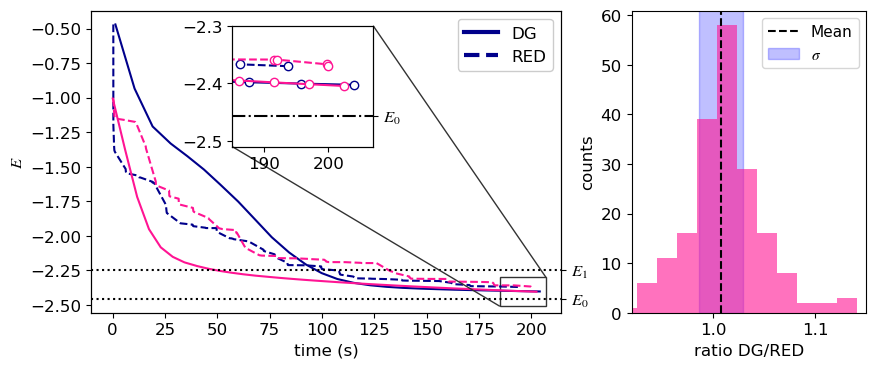

Ratio =  1.0076998342265593 +- 0.021640356530228198


In [2]:
#########################################

path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 5
fontsize = 12

color   = ['darkblue','deeppink']

indexes = [3,15]

#########################################

# reading the data
a=aux.readData('descent_gradient',path)
b=aux.readData('random_estimation_descent',path)

# CALCULUS................................
# final energy and final fidelity
aE=[a[i][1][-1] for i in range(len(a))]
bE=[b[i][1][-1] for i in range(len(b))]

# ratio calculus DG/RED
ratio=[]
for i in range(len(bE)):
    ratio.append(aE[i]/bE[i])

# exact energy
V,E0,E1=calc.exact_sol(N)

par(fontsize)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'width_ratios': [4, 2]})


# ax1 --------------------------------------
for i in range(len(indexes)):
    ax1.plot(a[indexes[i]][-1],a[indexes[i]][1],'-',color=color[i])
    ax1.plot(b[indexes[i]][-1],b[indexes[i]][1],'--',color=color[i])

ax1.axhline(E0,color='k',ls=':')
ax1.axhline(E1,color='k',ls=':')

ax1.set_ylabel('$E$')
ax1.set_xlabel('time (s)')
ax1.plot([],[],'-',lw=3,color='darkblue',label='DG')
ax1.plot([],[],'--',lw=3,color='darkblue',label='RED')
ax1.legend(loc=1,framealpha=1)

# twin axis
twin_ax = ax1.twinx()
twin_ax.set_yticks([E0,E1])
twin_ax.set_yticklabels(['$E_0$','$E_1$'])
twin_ax.set_ylim(ax1.get_ylim())

# axins -----------------------------------
axins = ax1.inset_axes([0.3, 0.55, 0.3, 0.4]) 

for i in range(len(indexes)):
    axins.plot(a[indexes[i]][-1],a[indexes[i]][1],'-',color=color[i],marker='o',markerfacecolor='w')
    axins.plot(b[indexes[i]][-1],b[indexes[i]][1],'--',color=color[i],marker='o',markerfacecolor='w')
    
axins.axhline(E0,color='k',ls='-.',label='$E_0$')
x1, x2, y1, y2 = 185, 207, -2.51,-2.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
mark_inset(ax1, axins, loc1=3, loc2=1, fc="none", ec="0.2")


# ax2 -----------------------------------
# histogram and mean
ax2.hist(ratio,color='deeppink',bins=14,alpha=0.6,density=False,histtype='stepfilled')
ax2.axvline(np.mean(ratio),linestyle='--',color='k',label='Mean')
# histogram filling between the mean
ax2.autoscale(False)
ax2.fill_between([np.mean(ratio)-np.std(ratio)/2,np.mean(ratio)+np.std(ratio)/2],[70,70],color='b',alpha=0.25,label='$\sigma$')
ax2.legend(fontsize=11,loc=1)

ax2.set_xlabel('ratio DG/RED')
ax2.set_ylabel('counts')
ax2.set_xlim((0.92,1.15))

# twin axis
twin_ax2 = axins.twinx()
twin_ax2.set_yticks([E0])
twin_ax2.set_yticklabels(['$E_0$'])
twin_ax2.set_ylim(axins.get_ylim())


plt.savefig(graphs+'results_DG_RED.pdf',format='pdf',bbox_inches='tight')
plt.show()


# final ratio
print('Ratio = ',np.mean(ratio),'+-',np.std(ratio)/2)

# Circuit analysis

Number of runs : 406


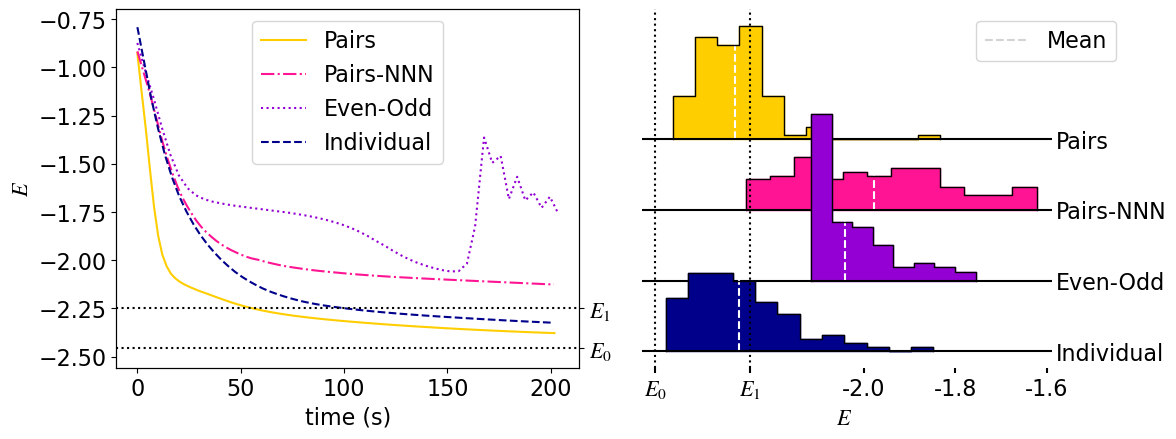

Even-Odd =  -2.0418045716980084 +- 0.043386237988606656
Pairs =  -2.2834894083283594 +- 0.039433755531661716
Pairs-NNN =  -1.977665429246614 +- 0.08391883124818598
Individual =  -2.2729902091698078 +- 0.05606474165181552


In [3]:
#########################################

path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 5
fontsize = 16

# separation on lines in histograms
delta  = 3.5
# event index to plot, and the height of the white lines
index0, D0 = 14, 3
index1, D1 = 4 , 5
index2, D2 = 9 , 3
index3, D3 = 1 , 6

color   = ['darkblue','deeppink']

indexes = [3,15]

#########################################


a=aux.readData('DG_modes',path)

#CALCULUS............................
# filtering for every method
a0=[a[i] for i in range(len(a)) if a[i][-1][0]==0]
a1=[a[i] for i in range(len(a)) if a[i][-1][0]==1]
a2=[a[i] for i in range(len(a)) if a[i][-1][0]==2]
a3=[a[i] for i in range(len(a)) if a[i][-1][0]==3]
# last energies of every methods
L0=[a0[i][1][-1] for i in range(len(a0))]
L1=[a1[i][1][-1] for i in range(len(a1))]
L2=[a2[i][1][-1] for i in range(len(a2))]
L3=[a3[i][1][-1] for i in range(len(a3))]

# exact energy
V,E0,E1=calc.exact_sol(N)

# histograms data extraction
bins=[8,12,12,12]
color=['darkviolet',(1, 206/255, 0),'deeppink','darkblue']
yb0,xb0,c=plt.hist(L0,color=color[0],bins=bins[0],density=True)
yb1,xb1,c=plt.hist(L1,color=color[1],bins=bins[1],density=True)
yb2,xb2,c=plt.hist(L2,color=color[2],bins=bins[2],density=True)
yb3,xb3,c=plt.hist(L3,color=color[3],bins=bins[3],density=True)
plt.close()

# histogram to arrays of each mode
X1,Y1 = hist_to_fill(xb1,yb1)
X2,Y2 = hist_to_fill(xb2,yb2)
X0,Y0 = hist_to_fill(xb0,yb0)###########
X3,Y3 = hist_to_fill(xb3,yb3)


par(fontsize)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'width_ratios': [4, 3.5]})
fig.tight_layout(pad=0)

# ax1 ----------------------------
# plot each run of each mode
ax1.plot(a1[index1][-2],a1[index1][1],'-',alpha=1,color=color[1],label='Pairs')
ax1.plot(a2[index2][-2],a2[index2][1],'-.',alpha=1,color=color[2],label='Pairs-NNN')
ax1.plot(a0[index0][-2],a0[index0][1],':',alpha=1,color=color[0],label='Even-Odd')
ax1.plot(a3[index3][-2],a3[index3][1],'--',alpha=1,color=color[3],label='Individual')

ax1.axhline(E0,color='k',ls=':')
ax1.axhline(E1,color='k',ls=':')

ax1.set_ylim(E0-0.1,-0.7)
ax1.legend(loc=9)
ax1.set_ylabel('$E$')
ax1.set_xlabel('time (s)')

# twin axes
twin_ax = ax1.twinx()
twin_ax.set_yticks([E0,E1])
twin_ax.set_yticklabels(['$E_0$','$E_1$'])
twin_ax.set_ylim(ax1.get_ylim())


# ax2 -----------------------------------
# histogram 1
ax2.plot(X1,Y1+delta*3,'k',zorder=1.2,lw=1)
ax2.fill_between(X1,Y1+delta*3,delta*3,zorder=1,color=color[1])
ax2.plot([np.mean(L1),np.mean(L1)],[delta*3,delta*3+D1],'--w',zorder=1.1)
ax2.axhline(delta*3,color='k',zorder=1.5)
# histogram 2
ax2.plot(X2,Y2+delta*2,'k',zorder=2.2,lw=1)
ax2.fill_between(X2,Y2+delta*2,delta*2,zorder=2,color=color[2])
ax2.plot([np.mean(L2),np.mean(L2)],[delta*2,delta*2+D2],'--w',zorder=2.1)
ax2.axhline(delta*2,color='k',zorder=2.5)
# histogram 0
ax2.plot(X0,Y0+delta*1,'k',zorder=3.2,lw=1)
ax2.fill_between(X0,Y0+delta*1,delta*1,zorder=3,color=color[0])
ax2.plot([np.mean(L0),np.mean(L0)],[delta*1,delta*1+D0],'--w',zorder=3.1)
ax2.axhline(delta*1,color='k',zorder=3.5)
# histogram 3
ax2.plot(X3,Y3+delta*0,'k',zorder=4.2,lw=1)
ax2.fill_between(X3,Y3+delta*0,delta*0,zorder=4,color=color[3])
ax2.plot([np.mean(L3),np.mean(L3)],[delta*0,delta*0+D3],'--w',zorder=4.1)
ax2.axhline(delta*0,color='k',zorder=4.5)

ax2.axvline(E1,color='k',linestyle=':',zorder=10)
ax2.axvline(E0,color='k',linestyle=':',zorder=10)

ax2.set_frame_on(False)
ticks  = ax2.get_xticks()[1:]
labels = ax2.get_xticks().tolist()[1:]
ticks[0]  = E0
ticks[1]  = E1
labels[0] = '$E_0$'
labels[1] = '$E_1$'
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels)
ax2.set_yticks([delta*0,delta*1,delta*2,delta*3])
ax2.set_yticklabels(['Individual','Even-Odd','Pairs-NNN','Pairs'])
ax2.xaxis.set_tick_params(width=1.5)
ax2.yaxis.set_tick_params(width=1.5)
ax2.yaxis.tick_right()
ax2.set_xlabel('$E$')
ax2.set_xlim((E0-0.03,-1.6))
ax2.plot([],[],color='lightgray',ls='--',label='Mean')
ax2.legend(bbox_to_anchor=(1.2,1))


plt.savefig(graphs+'results_circuit.pdf',format='pdf',bbox_inches='tight')
plt.show()

print('Even-Odd = ',np.mean(L0),'+-',np.std(L0)/2)
print('Pairs = ',np.mean(L1),'+-',np.std(L1)/2)
print('Pairs-NNN = ',np.mean(L2),'+-',np.std(L2)/2)
print('Individual = ',np.mean(L3),'+-',np.std(L3)/2)

# Final results

Number of runs : 398


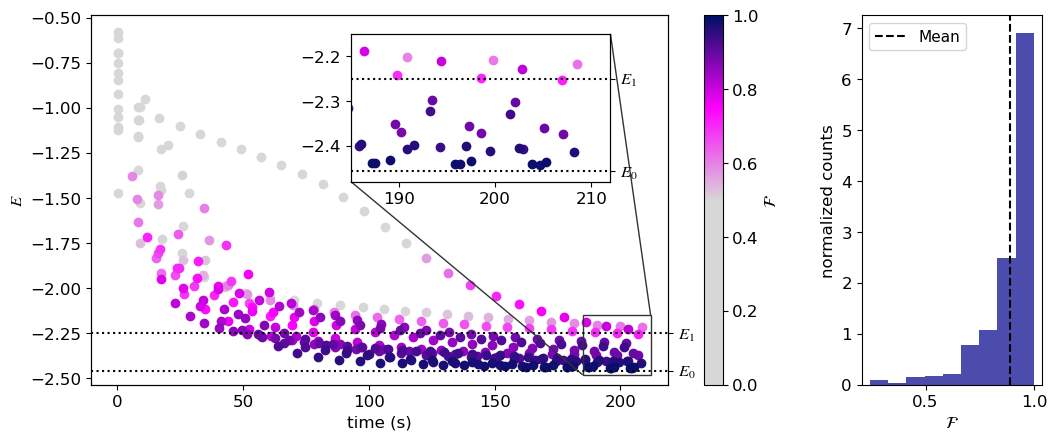

Fidelity =  0.889683634435353 +- 0.062369140785630876


In [4]:
#########################################

path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 5
fontsize = 12

#########################################

# read data of DG
a=aux.readData('descent_gradient',path)

# CALCULUS ...............................
# last energy and last fidelity
aE=[a[i][1][-1] for i in range(len(a))]
aF=[a[i][2][-1] for i in range(len(a))]

# select 15 random runs
np.random.seed(13)
rand = [int(np.random.rand()*42) for k in range(15)]
a    = [a[i] for i in range(len(a)) if i in rand]

# exact solution 
V,E0,E1 = calc.exact_sol(N)

par(fontsize)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'width_ratios': [4, 1]})
fig.tight_layout(pad=0)

# ax1 -------------------------
# plot the points with the respective fidelity as a color
for i in range(len(a)):
    for j in range(len(a[i][-1])):
        ax1.plot(a[i][-1][j],a[i][1][j],'o',color=pinkred(a[i][2][j]),zorder=a[i][2][j])
ax1.axhline(E0,color='k',ls=':',label='$E_0$')
ax1.axhline(E1,color='k',ls=':',label='$E_1$')

ax1.set_ylabel('$E$')
ax1.set_xlabel('time (s)')
gray=(215/255,215/255,215/255)
cmap = colors.LinearSegmentedColormap.from_list('', [gray,gray,gray,(1,0,1),(0,15/255,100/255)])
sm   = plt.cm.ScalarMappable(cmap=cmap, norm=colors.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm,ax=ax1,label='$\mathcal{F}$')

# twin axis
twin_ax = ax1.twinx()
twin_ax.set_yticks([E0,E1])
twin_ax.set_yticklabels(['$E_0$','$E_1$'])
twin_ax.set_ylim(ax1.get_ylim())

# axins -----------------------------------
axins = ax1.inset_axes([0.45, 0.55, 0.45, 0.4]) 
# plot the points again
for i in range(len(a)):
    for j in range(len(a[i][-1])):
        axins.plot(a[i][-1][j],a[i][1][j],'o',color=pinkred(a[i][2][j]),zorder=a[i][2][j])
axins.axhline(E1,color='k',ls=':')
axins.axhline(E0,color='k',ls=':')

x1, x2, y1, y2 = 185, 212, -2.48,-2.15
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
mark_inset(ax1, axins, loc1=3, loc2=1, fc="none", ec="0.2")
# twin axis
twin_ax2 = axins.twinx()
twin_ax2.set_yticks([E0,E1])
twin_ax2.set_yticklabels(['$E_0$','$E_1$'])
twin_ax2.set_ylim(axins.get_ylim())

# ax2 -----------------------------
# histogram and mean
ax2.hist(aF,color='darkblue',alpha=0.7,bins=9,density=True,histtype='stepfilled')
ax2.axvline(np.mean(aF),linestyle='--',color='k',label='Mean')

ax2.legend(fontsize=11)
ax2.set_ylabel('normalized counts')
ax2.set_xlabel('$\mathcal{F}$')



plt.savefig(graphs+'results1.pdf',format='pdf',bbox_inches='tight')
plt.show()

print('Fidelity = ',np.mean(aF),'+-',np.std(aF)/2)

# $N=8$  data

Number of runs : 18


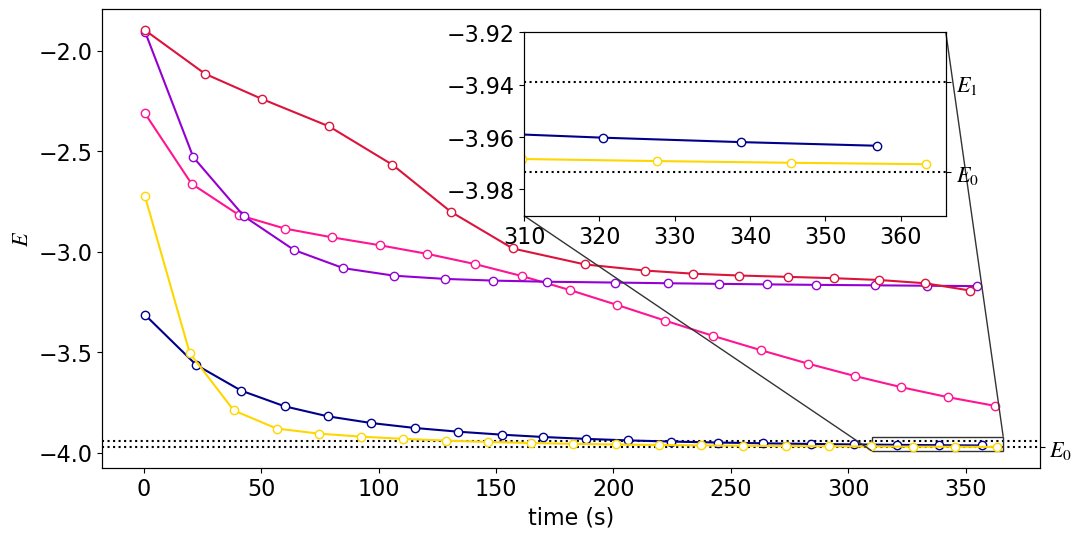

In [13]:
#########################################

path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 8
fontsize = 16


index  = [0,2,6,8,9]
color  = ['darkblue','gold','deeppink','darkviolet','crimson']
#########################################

# read data of DG
a=aux.readData('descent_gradientN8',path)

# CALCULUS ...............................
# select 15 random runs
np.random.seed(13)

# exact solution 
V,E0,E1 = calc.exact_sol(N)

par(fontsize)
fig, (ax1) = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=0)

# ax1 -------------------------
# plot the points with the respective fidelity as a color
for i in range(len(index)):
    ax1.plot(a[index[i]][-1],a[index[i]][1],'-',color=color[i],marker='o',markerfacecolor='w')
    
ax1.axhline(E0,color='k',ls=':',label='$E_0$',zorder=0)
ax1.axhline(E1,color='k',ls=':',label='$E_1$',zorder=0)

ax1.set_ylabel('$E$')
ax1.set_xlabel('time (s)')

# twin axis
twin_ax = ax1.twinx()
twin_ax.set_yticks([E0])
twin_ax.set_yticklabels(['$E_0$'])
twin_ax.set_ylim(ax1.get_ylim())

# axins -----------------------------------
axins = ax1.inset_axes([0.45, 0.55, 0.45, 0.4]) 
# plot the points again
for i in range(len(index)):
    axins.plot(a[index[i]][-1],a[index[i]][1],'-',color=color[i],marker='o',markerfacecolor='w')
        
axins.axhline(E1,color='k',ls=':')
axins.axhline(E0,color='k',ls=':')

x1, x2, y1, y2 = 310, 366, -3.99,-3.92
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
mark_inset(ax1, axins, loc1=3, loc2=1, fc="none", ec="0.2")
# twin axis
twin_ax2 = axins.twinx()
twin_ax2.set_yticks([E0,E1])
twin_ax2.set_yticklabels(['$E_0$','$E_1$'])
twin_ax2.set_ylim(axins.get_ylim())



plt.savefig(graphs+'resultsN=8.pdf',format='pdf',bbox_inches='tight')
plt.show()

 # Total density

Number of runs : 398


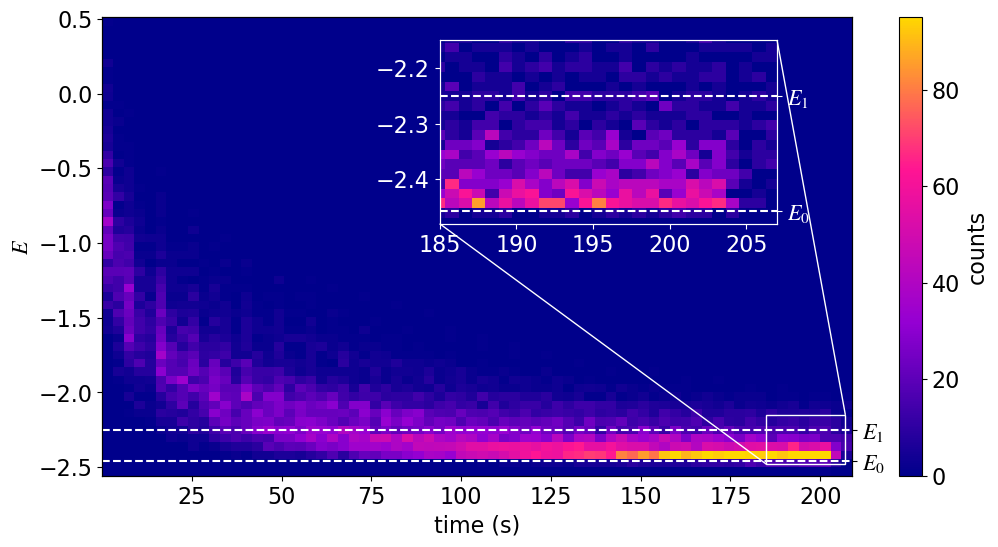

Number of runs : 199


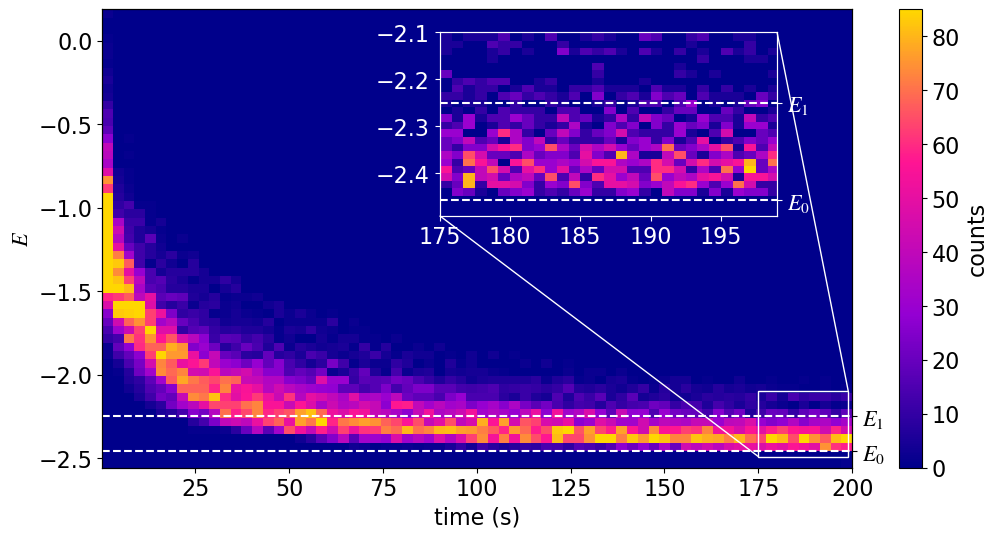

In [6]:
#########################################

path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 5
fontsize = 16

#########################################

filenames = ['DG_full_dataset','RED_full_dataset']
datanames = ['descent_gradient','random_estimation_descent']
frame     = [[185, 207, -2.48,-2.15],[175, 199, -2.49,-2.1]]
countscuT = [95,85]
countscut = [20, 17]

cmap = colors.LinearSegmentedColormap.from_list('', ['darkblue','darkviolet','deeppink','gold'])

for k in range(2):

    # read data of DG
    a=aux.readData(datanames[k],path)

    # CALCULUS ...............................
    # exact solution 
    V,E0,E1 = calc.exact_sol(N)    
    
    TotE = [a[i][1][j] for i in range(len(a)) for j in range(len(a[i][1]))]
    TotT = [a[i][3][j] for i in range(len(a)) for j in range(len(a[i][3]))]
    TotE.append(E0-0.1)
    TotT.append(200)

    par(fontsize)
    fig, (ax1) = plt.subplots(figsize=(10,5))
    fig.tight_layout(pad=0)

    # ax1 -------------------------
    # plot the points with the respective fidelity as a color
    hist = ax1.hist2d(TotT,TotE,bins=(70,55),rasterized=True,cmap=cmap,vmax=countscuT[k])
    cbar = plt.colorbar(hist[3],ax=ax1,label='counts')
    
    ax1.axhline(E0,color='w',ls='--',label='$E_0$')
    ax1.axhline(E1,color='w',ls='--',label='$E_1$')

    ax1.set_ylabel('$E$')
    ax1.set_xlabel('time (s)')
    
    # twin axis
    twin_ax = ax1.twinx()
    twin_ax.set_yticks([E0,E1])
    twin_ax.set_yticklabels(['$E_0$','$E_1$'])
    twin_ax.set_ylim(ax1.get_ylim())

    # axins -----------------------------------
    axins = ax1.inset_axes([0.45, 0.55, 0.45, 0.4]) 
    # plot the points again
    hist = axins.hist2d(TotT,TotE,bins=(240,175),rasterized=True,cmap=cmap,vmax=countscut[k])

    axins.axhline(E1,color='w',ls='--')
    axins.axhline(E0,color='w',ls='--')

    x1, x2, y1, y2 = frame[k][0],frame[k][1],frame[k][2],frame[k][3]
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    mark_inset(ax1, axins, loc1=3, loc2=1, fc="none", ec="w")
    axins.tick_params(axis='x', colors='w')
    axins.tick_params(axis='y', colors='w')
    axins.spines['top'].set_color('w')
    axins.spines['bottom'].set_color('w')
    axins.spines['right'].set_color('w')
    axins.spines['left'].set_color('w')
    # twin axis
    twin_ax2 = axins.twinx()
    twin_ax2.set_yticks([E0,E1])
    twin_ax2.set_yticklabels(['$E_0$','$E_1$'])
    twin_ax2.set_ylim(axins.get_ylim())
    twin_ax2.tick_params(axis='y', colors='w')
    twin_ax2.spines['top'].set_color('w')
    twin_ax2.spines['bottom'].set_color('w')
    twin_ax2.spines['right'].set_color('w')
    twin_ax2.spines['left'].set_color('w')


    plt.savefig(graphs+filenames[k]+'.pdf',format='pdf',bbox_inches='tight')
    plt.show()

# Few runs

Number of runs : 398


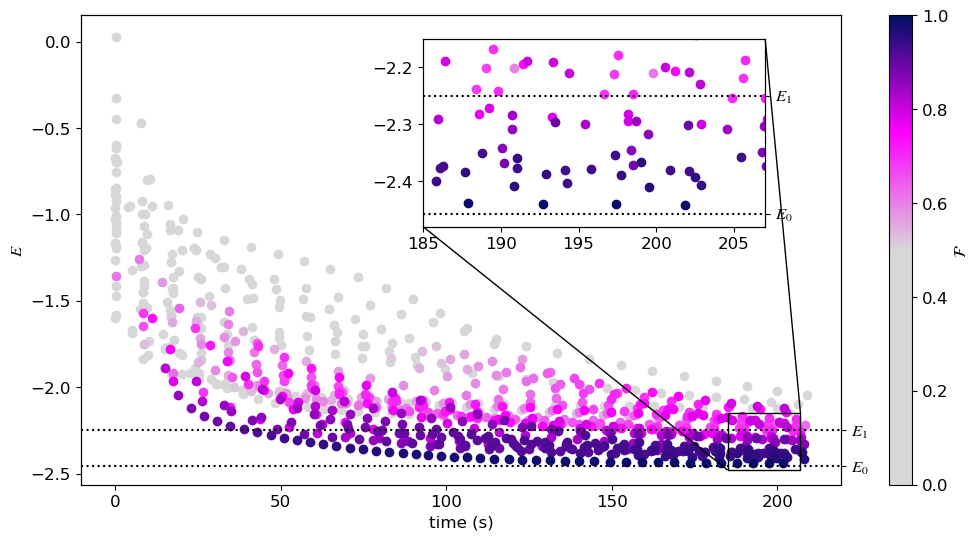

Number of runs : 199


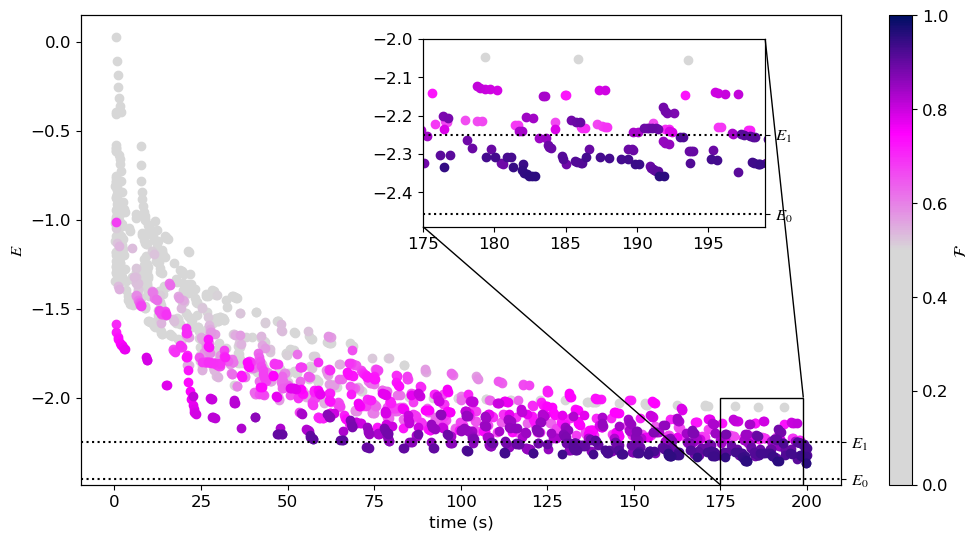

In [7]:
#########################################

path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 5
fontsize = 12

#########################################

filenames = ['DG_big_dataset','RED_big_dataset']
datanames = ['descent_gradient','random_estimation_descent']
frame     = [[185, 207, -2.48,-2.15],[175, 199, -2.49,-2]]
datacut   = [[20,50],[10,30]]

for k in range(2):

    # read data of DG
    a=aux.readData(datanames[k],path)[datacut[k][0]:datacut[k][1]]

    # CALCULUS ...............................
    # exact solution 
    V,E0,E1 = calc.exact_sol(N)

    par(fontsize)
    fig, (ax1) = plt.subplots(figsize=(10,5))
    fig.tight_layout(pad=0)

    # ax1 -------------------------
    # plot the points with the respective fidelity as a color
    for i in range(len(a)):
        for j in range(len(a[i][-1])):
            ax1.plot(a[i][-1][j],a[i][1][j],'o',color=pinkred(a[i][2][j]),zorder=a[i][2][j])
    ax1.axhline(E0,color='k',ls=':',label='$E_0$')
    ax1.axhline(E1,color='k',ls=':',label='$E_1$')

    ax1.set_ylabel('$E$')
    ax1.set_xlabel('time (s)')
    gray=(215/255,215/255,215/255)
    cmap = colors.LinearSegmentedColormap.from_list('', [gray,gray,gray,(1,0,1),(0,15/255,100/255)])
    sm   = plt.cm.ScalarMappable(cmap=cmap, norm=colors.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar(sm,ax=ax1,label='$\mathcal{F}$')

    # twin axis
    twin_ax = ax1.twinx()
    twin_ax.set_yticks([E0,E1])
    twin_ax.set_yticklabels(['$E_0$','$E_1$'])
    twin_ax.set_ylim(ax1.get_ylim())

    # axins -----------------------------------
    axins = ax1.inset_axes([0.45, 0.55, 0.45, 0.4]) 
    # plot the points again
    for i in range(len(a)):
        for j in range(len(a[i][-1])):
            axins.plot(a[i][-1][j],a[i][1][j],'o',color=pinkred(a[i][2][j]),zorder=a[i][2][j])
    axins.axhline(E1,color='k',ls=':')
    axins.axhline(E0,color='k',ls=':')

    x1, x2, y1, y2 = frame[k][0],frame[k][1],frame[k][2],frame[k][3]
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    mark_inset(ax1, axins, loc1=3, loc2=1, fc="none", ec="k")
    # twin axis
    twin_ax2 = axins.twinx()
    twin_ax2.set_yticks([E0,E1])
    twin_ax2.set_yticklabels(['$E_0$','$E_1$'])
    twin_ax2.set_ylim(axins.get_ylim())



    plt.savefig(graphs+filenames[k]+'.pdf',format='pdf',bbox_inches='tight')
    plt.show()

# Histogram DG and RED

Number of runs : 398
Number of runs : 199


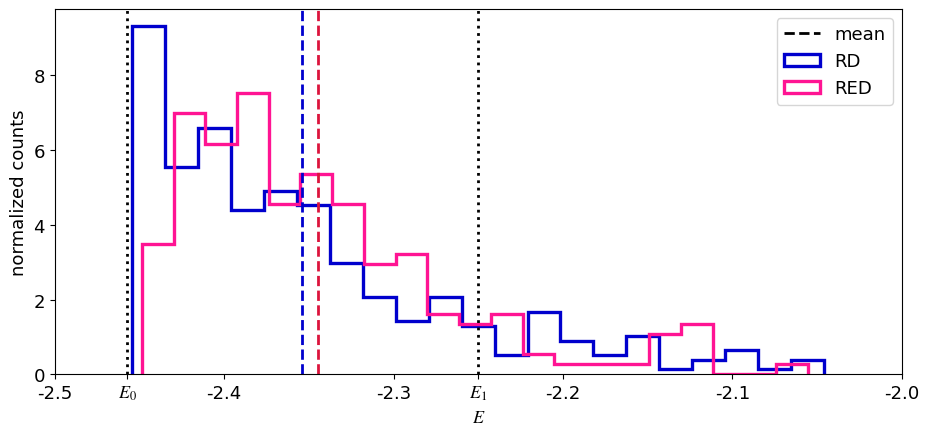

In [8]:
#### 
path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 5
fontsize = 13

#########################################

# read data of DG and RED
a = aux.readData('descent_gradient',path)
b = aux.readData('random_estimation_descent',path)

# CALCULUS ...............................
# last point calculus
aE = [a[i][1][-1] for i in range(len(a))]
bE = [b[i][1][-1] for i in range(len(b))]
# exact solution 
V,E0,E1 = calc.exact_sol(N)

par(fontsize)
fig, (ax1) = plt.subplots(figsize=(9,4))
fig.tight_layout(pad=0)

# ax1 -------------------------
# each histogram 
ax1.hist(aE,color='mediumblue',alpha=1,bins=21,lw=2.4,density=True,histtype='step',label='RD')
ax1.hist(bE,color='deeppink',alpha=1,bins=21,lw=2.4,density=True,histtype='step',label='RED')

ax1.axvline(E0,color='k',ls=':',lw=2)
ax1.axvline(E1,color='k',ls=':',lw=2)
ax1.axvline(np.mean(aE),color='mediumblue',ls='--',lw=2)
ax1.axvline(np.mean(bE),color='crimson',ls='--',lw=2)

ax1.set_ylabel('normalized counts')
ax1.set_xlabel('$E$')
ax1.plot([],[],'k--',lw=2,label='mean')
ax1.legend()
xt = ax1.get_xticks() 
xt=np.append(xt,E0)
xt=np.append(xt,E1)
xtl=xt.tolist()
xtl[-1],xtl[-2]='$E_1$','$E_0$'
ax1.set_xticks(xt)
ax1.set_xticklabels(xtl)

plt.savefig(graphs+'DG-RED_hist'+'.pdf',format='pdf',bbox_inches='tight')
plt.show()

# Local minima achieving

Number of runs : 398


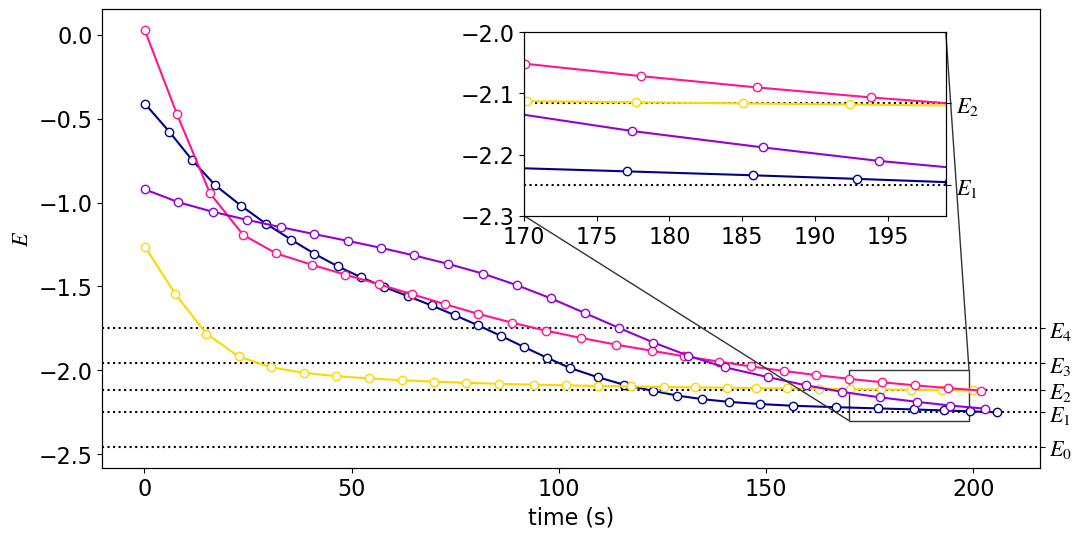

In [14]:
def exact_solN(N):
    
    
    H=ham.XXZ(N,1,1,1,1,1)

    E,V=H.eigsh(k=5,which="SA",maxiter=1E4)
    V=np.transpose(V)[0]
    
    return V,E[0],E[1],E[2],E[3],E[4]


#########################################

path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 5
fontsize = 16


index  = [13,23,24,30]
color  = ['darkblue','gold','deeppink','darkviolet','crimson']*50
#########################################

# read data of DG
a=aux.readData('descent_gradient',path)

# CALCULUS ...............................
# exact solution 
V,E0,E1,E2,E3,E4 = exact_solN(N)
    
par(fontsize)
fig, (ax1) = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=0)    

# ax1 -------------------------
# plot the points with the respective fidelity as a color
for i in range(len(index)):
    ax1.plot(a[index[i]][-1],a[index[i]][1],'-',color=color[i],marker='o',markerfacecolor='w')


ax1.axhline(E0,color='k',ls=':',label='$E_0$',zorder=0)
ax1.axhline(E1,color='k',ls=':',label='$E_1$',zorder=0)
ax1.axhline(E2,color='k',ls=':',label='$E_2$',zorder=0)
ax1.axhline(E3,color='k',ls=':',label='$E_3$',zorder=0)
ax1.axhline(E4,color='k',ls=':',label='$E_4$',zorder=0)

ax1.set_ylabel('$E$')
ax1.set_xlabel('time (s)')

# twin axis
twin_ax = ax1.twinx()
twin_ax.set_yticks([E0,E1,E2,E3,E4])
twin_ax.set_yticklabels(['$E_0$','$E_1$','$E_2$','$E_3$','$E_4$'])
twin_ax.set_ylim(ax1.get_ylim())

# axins -----------------------------------
axins = ax1.inset_axes([0.45, 0.55, 0.45, 0.4]) 
# plot the points again
for i in range(len(index)):
    axins.plot(a[index[i]][-1],a[index[i]][1],'-',color=color[i],marker='o',markerfacecolor='w')
        
axins.axhline(E0,color='k',ls=':',zorder=0)
axins.axhline(E1,color='k',ls=':',zorder=0)
axins.axhline(E2,color='k',ls=':',zorder=0)
axins.axhline(E3,color='k',ls=':',zorder=0)
axins.axhline(E4,color='k',ls=':',zorder=0)

x1, x2, y1, y2 = 170, 199, -2.3,-2.
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
mark_inset(ax1, axins, loc1=3, loc2=1, fc="none", ec="0.2")

# twin axis
twin_ax2 = axins.twinx()
twin_ax2.set_yticks([E0,E1,E2,E3,E4])
twin_ax2.set_yticklabels(['$E_0$','$E_1$','$E_2$','$E_3$','$E_4$'])
twin_ax2.set_ylim(axins.get_ylim())

plt.savefig(graphs+'DG_excited.pdf',format='pdf',bbox_inches='tight')
plt.show()

# Density plot of circuits

Number of runs : 406


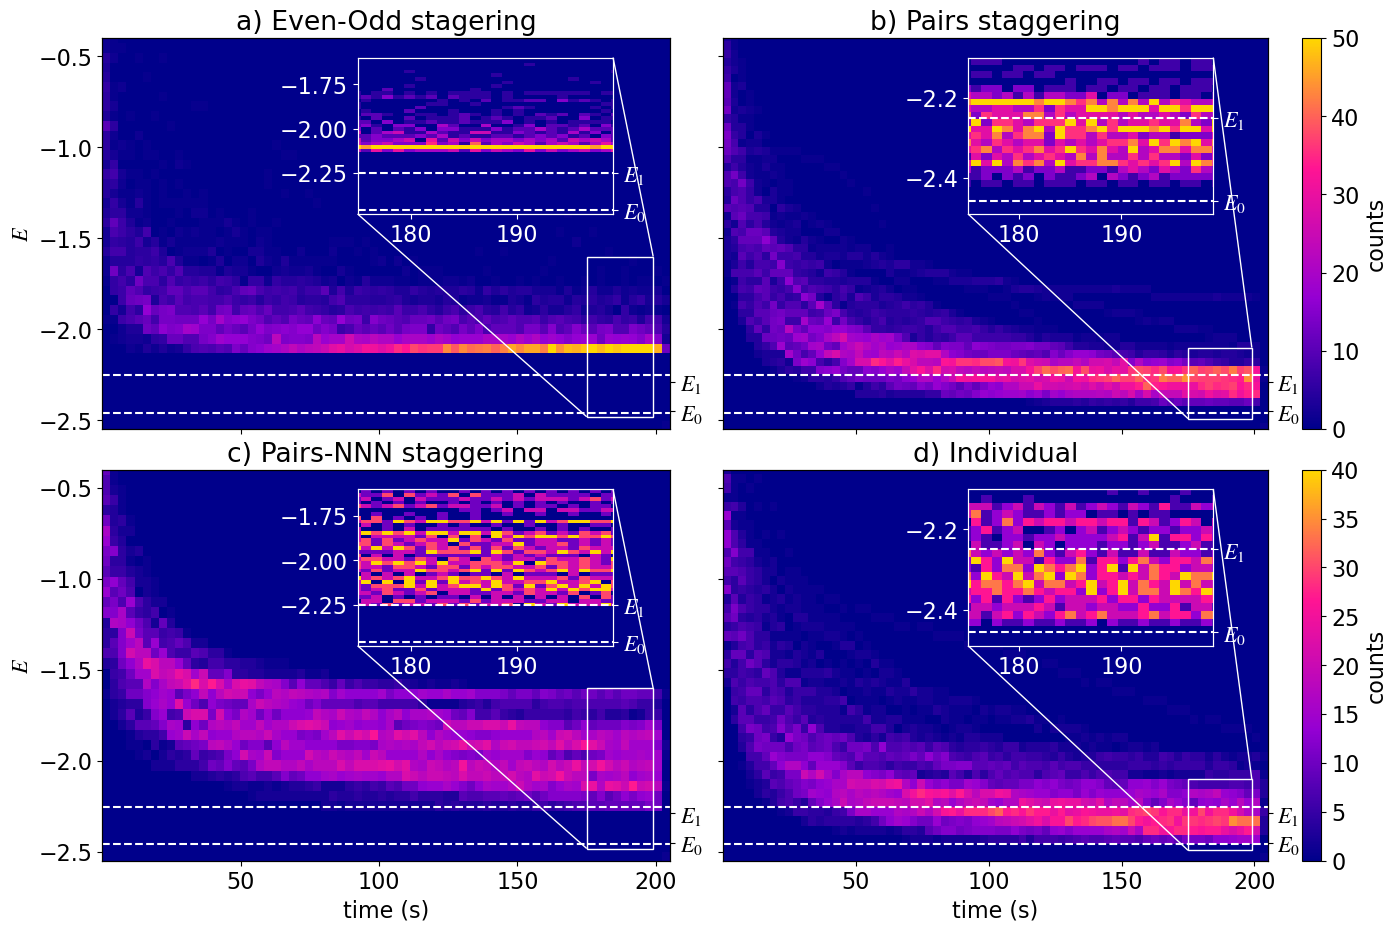

In [11]:
#########################################

path   = '/home/juan/Desktop/data/'
graphs = '/home/juan/Desktop/graphs/'
N      = 5
fontsize = 16

#########################################


frame     = [[[175, 199, -2.48,-1.6],[175, 199, -2.49,-2.1]],[[175, 199, -2.48,-1.6],[175, 199, -2.49,-2.1]]]
countscuT = [[60,50],[40,40]]
countscut = [[10,7],[4,6]]
title     = [['a) Even-Odd stagering','b) Pairs staggering'],['c) Pairs-NNN staggering','d) Individual']]

cmap = colors.LinearSegmentedColormap.from_list('', ['darkblue','darkviolet','deeppink','gold'])


# read data of DG
a=aux.readData('DG_modes',path)

# CALCULUS ...............................
# exact solution 
V,E0,E1 = calc.exact_sol(N)

# filtering for every method
a0=[a[i] for i in range(len(a)) if a[i][-1][0]==0]
TotE0 = [a0[i][1][j] for i in range(len(a0)) for j in range(len(a0[i][1]))]
TotT0 = [a0[i][3][j] for i in range(len(a0)) for j in range(len(a0[i][3]))]
TotE0.append(E0-0.1)
TotT0.append(205)

a1=[a[i] for i in range(len(a)) if a[i][-1][0]==1]
TotE1 = [a1[i][1][j] for i in range(len(a1)) for j in range(len(a1[i][1]))]
TotT1 = [a1[i][3][j] for i in range(len(a1)) for j in range(len(a1[i][3]))]
TotE1.append(E0-0.1)
TotT1.append(205)

a2=[a[i] for i in range(len(a)) if a[i][-1][0]==2]
TotE2 = [a2[i][1][j] for i in range(len(a2)) for j in range(len(a2[i][1]))]
TotT2 = [a2[i][3][j] for i in range(len(a2)) for j in range(len(a2[i][3]))]
TotE2.append(E0-0.1)
TotT2.append(205)

a3=[a[i] for i in range(len(a)) if a[i][-1][0]==3]
TotE3 = [a3[i][1][j] for i in range(len(a3)) for j in range(len(a3[i][1]))]
TotT3 = [a3[i][3][j] for i in range(len(a3)) for j in range(len(a3[i][3]))]
TotE3.append(E0-0.1)
TotT3.append(205)

aa = [[TotE0,TotE1],[TotE2,TotE3]]
tt = [[TotT0,TotT1],[TotT2,TotT3]]

par(fontsize)
fig, ax = plt.subplots(2,2,figsize=(14,9), sharex=True, sharey=True,gridspec_kw={'width_ratios': [5,6]})
fig.tight_layout(pad=0.8)


for k in range(2):
    for kk in range(2):
        # ax1 -------------------------
        # plot the points with the respective fidelity as a color
        hist = ax[k][kk].hist2d(tt[k][kk],aa[k][kk],bins=(70,55),rasterized=True,cmap=cmap,vmax=countscuT[k][kk])
        if kk==1:
            cbar = plt.colorbar(hist[3],ax=ax[k][kk],label='counts')

        ax[k][kk].axhline(E0,color='w',ls='--',label='$E_0$')
        ax[k][kk].axhline(E1,color='w',ls='--',label='$E_1$')

        if kk==0:
            ax[k][kk].set_ylabel('$E$')
        if k==1:
            ax[k][kk].set_xlabel('time (s)')
        ax[k][kk].set_title(title[k][kk])
        ax[k][kk].set_ylim((E0-0.09,-0.4))
    
        # twin axis
        twin_ax = ax[k][kk].twinx()
        twin_ax.set_yticks([E0,E1])
        twin_ax.set_yticklabels(['$E_0$','$E_1$'])
        twin_ax.set_ylim(ax1.get_ylim())

        # axins -----------------------------------
        axins = ax[k][kk].inset_axes([0.45, 0.55, 0.45, 0.4]) 
        # plot the points again
        hist = axins.hist2d(tt[k][kk],aa[k][kk],bins=(200,145),rasterized=True,cmap=cmap,vmax=countscut[k][kk])

        axins.axhline(E1,color='w',ls='--')
        axins.axhline(E0,color='w',ls='--')

        x1, x2, y1, y2 = frame[k][kk][0],frame[k][kk][1],frame[k][kk][2],frame[k][kk][3]
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        mark_inset(ax[k][kk], axins, loc1=3, loc2=1, fc="none", ec="w")
        axins.tick_params(axis='x', colors='w')
        axins.tick_params(axis='y', colors='w')
        axins.spines['top'].set_color('w')
        axins.spines['bottom'].set_color('w')
        axins.spines['right'].set_color('w')
        axins.spines['left'].set_color('w')
        # twin axis
        twin_ax2 = axins.twinx()
        twin_ax2.set_yticks([E0,E1])
        twin_ax2.set_yticklabels(['$E_0$','$E_1$'])
        twin_ax2.set_ylim(axins.get_ylim())
        twin_ax2.tick_params(axis='y', colors='w')
        twin_ax2.spines['top'].set_color('w')
        twin_ax2.spines['bottom'].set_color('w')
        twin_ax2.spines['right'].set_color('w')
        twin_ax2.spines['left'].set_color('w')


plt.savefig(graphs+'density_circuits'+'.pdf',format='pdf',bbox_inches='tight')
plt.show()